# **Un-supervised Learning Techniques** #
- *The unsupervised learning is a major portion of intelligence which has the most potential to be yet explored.*
- *It works with the unlabeled data i.e. as in the classification algorithms , with certain features the target class of that instance in also mentioned , in unsupervised learning you have the features but no target class. (It has to be figured out by your ML model)*

## **Clustering** ##
- instances of similar kind are grouped together in whole data set.
- Basically the whole dataset is divided into n many clusters.
- It makes good use of all the features associated with an instance.

**Used for :**
- Customer segmentation.
- For data analysis.
- Dimensionality reduction (Lets say it replaces the feature vector of each instance with vector of cluster affinities (affinity means how well an instance fits into cluster) which tells the affinity of each instance with every cluster . It reduces the dimensions from feature vector to just number of clusters present).
- Anomaly detection (Instance with low affinities with every cluster is an anomaly).
- Segment an image (replace cluster of similar colurs with its mean color which eventually reduces number of colors).
- Semi supervised learning. 
- Search engines.

In [1]:
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



# Generate synthetic dataset
X, y = make_blobs(n_samples=5000, centers=5, cluster_std=0.7, random_state=42)


In [2]:
X.shape,y.shape

((5000, 2), (5000,))

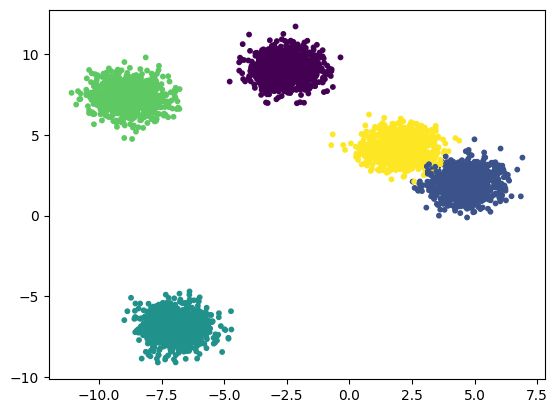

In [3]:
plt.scatter(X[:,0],X[:,1],c=y,s=10,cmap='viridis')

In [4]:
from sklearn.cluster import KMeans
k=5
km_cluster=KMeans(n_clusters=k)
y_pred=km_cluster.fit(X)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [5]:
y_pred.labels_


array([0, 0, 4, ..., 2, 2, 3])

In [6]:
km_cluster.cluster_centers_

array([[-2.49006195,  9.0520916 ],
       [-6.9081377 , -6.91881132],
       [ 4.62373299,  1.97848545],
       [-8.82045181,  7.30497016],
       [ 1.99368995,  4.19029707]])

In [7]:
X_new=np.array([[1.5,4],[-8,7],[-7,-7]])
km_cluster.predict(X_new)

array([4, 3, 1])

**KMeans doesn't behave well when the diameter of blobs differ because all it cares is the distance from centroid.**
*Instead of assigning each instance to one cluster (hard clustering) we can get for every instance a score per cluster which is basically how far thay instance is from all the clusters(Score like affinity)*

In [8]:
km_cluster.transform(X_new)


array([[ 6.43771884, 13.78104568,  3.72078337, 10.83672245,  0.52909615],
       [ 5.87966812, 13.96157125, 13.58581036,  0.87529879, 10.38114971],
       [16.67360746,  0.12259806, 14.68755833, 14.42034036, 14.35650401]])

## K-Mean Algorithm ##

- *This works in such a way that if you are given centeroids it assigns every instance to a cluster whose centeroid is closest to that instance . If you are given with labels , It finds the centeroid by taking the mean of all instances*.
- *If neither is given , it takes a random k value with random centers , find the mean and iteratively update the centeroids location untill it converges.*

### Centeroid initilaization method ###
- if you have run the clustering algorithm before and you have a rough idea where the centeroids might be , you can initialize the algorithm by providing those points.

In [9]:
centers=np.array([[-9,6],[-7,-7],[-2.5,9],[2,4],[5,2]])
kmeans=KMeans(n_clusters=5,init=centers,n_init=1)

- Another method is to run the algorithm multiple times and select the best solution . Best refers to the one having lowes intertia value which is mean squared distance between each instance and the centeroid near to it.
- Latest advancement is KMeans++ which tends to select the centeroids distant from each other.
- Another way is to use accelarated Kmeans which exploits the triangel inequality i.e. straight line is the shortest distance between instance and centeroid.
- Mini batches is another important algorithm , it divides the whole data set into 3 4 mini batches and it fits the model in batches (Feasible when dataset is very large and you need to run the algorithm in most optimised way possible).

In [10]:
from sklearn.cluster import MiniBatchKMeans
minibatcheskmeans=MiniBatchKMeans(n_clusters=5)
minibatcheskmeans.fit(X)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1934: FutureWarning: The default value of `n_init` will change from 3 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=3)


MiniBatchKMeans(n_clusters=5)

### Finding best number of centeroids ###
- In our case it was pretty obvious that number of clusters are 5 and so should be the number of centeroids , but generally it's not so straight forward even if we see the lowest inertia.
- Here comes silhoutte coefficient which is (b-a)/max(a,b) where a is the mean distance to other instances in that same cluster and b is the mean near cluster distance . It varies from -1 to 1 , 1 means that it is well in it's cluster , 0 means it is on the boundary  and -1 means that it's in the wrong cluster.

In [11]:
from sklearn.metrics import silhouette_score
silhouette_score(X,km_cluster.labels_)

0.7597126258515744

In [12]:
km_cluster.labels_

array([0, 0, 4, ..., 2, 2, 3])

In [13]:
sc_array=[]
for x in range(2,6):
    kmeans=KMeans(n_clusters=x)
    kmeans.fit(X)
    sc=silhouette_score(X,kmeans.labels_)
    print(f"The silhoutte scores is {sc} when the number of clusters are {x}")
    sc_array.append(sc)
    

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhoutte scores is 0.610643762692362 when the number of clusters are 2


c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhoutte scores is 0.7333682376084284 when the number of clusters are 3


c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhoutte scores is 0.7844246943440029 when the number of clusters are 4


c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


The silhoutte scores is 0.7597126258515744 when the number of clusters are 5


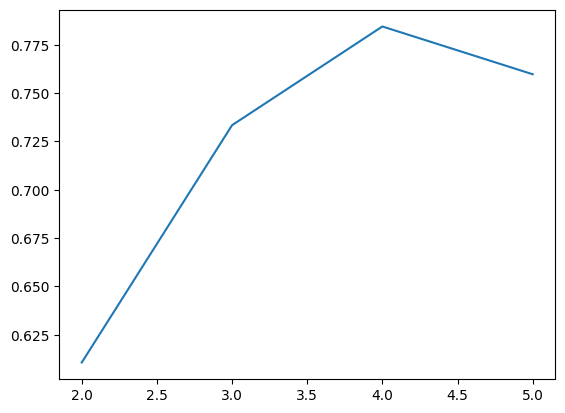

In [14]:
index=[2,3,4,5]
plt.plot(index,sc_array)


## Applications ##
- ### Image segmentation ###
- In segmentaion all instances that are part of same object are assigned to a segment , but the downside is every object gets a seperate segment .
*We will use it for just color segmentation* 

<function matplotlib.pyplot.show(close=None, block=None)>

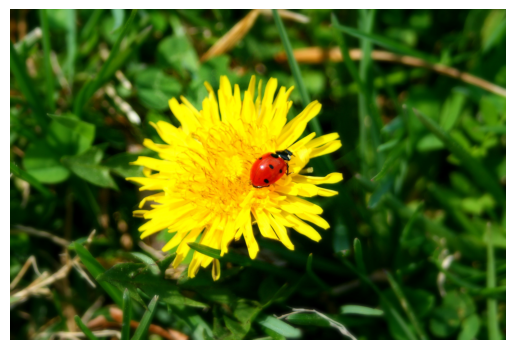

In [15]:
import os
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Define the path to your image
image_path = "D:/User/Downloads/wallpaperflare.com_wallpaper.jpg"
image=imread(image_path)
plt.imshow(image)
plt.axis('off')
plt.show


In [16]:
image[5,5,1]

28

In [17]:
X=image.reshape(-1,3)
kmean=KMeans(n_clusters=5).fit(X)
segmented_img=kmean.cluster_centers_[kmean.labels_]
segmented_img=segmented_img.reshape(image.shape)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


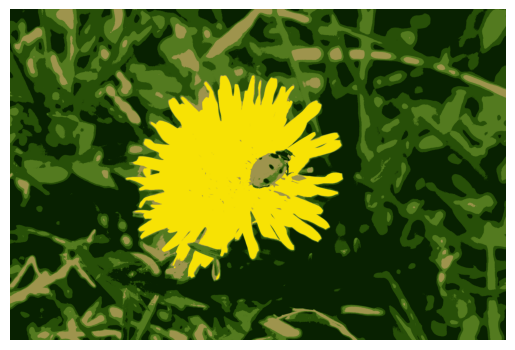

In [18]:
segmented_img = np.clip(segmented_img, 0, 255).astype('uint8')

# Display the segmented image
plt.imshow(segmented_img)
plt.axis('off')  # Turn off axis labels
plt.show()

## Clustering for Preprocessing ##
- Clustering is used for reducing the dimensions of data as a preprocessing step.

- We will be using digits dataset containing 1797 grayscale 8x8 images of digits from 0 to 9

In [19]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_digits,y_digits=load_digits(return_X_y=True)
y_digits

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X_digits,y_digits)
log_reg=LogisticRegression().fit(X_train,y_train)
log_reg.score(X_test,y_test)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9533333333333334

**Let's use K means as a preprocessing step to reduce dimensionss and see the score then.**

In [21]:
from sklearn.pipeline import Pipeline
log_red_reg=Pipeline([
    ('kmeans',KMeans(n_clusters=50)),
    ('log_reg',LogisticRegression())
])

log_red_reg.fit(X_train,y_train)
log_red_reg.score(X_test,y_test)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9511111111111111

*Here we don't need to calculate the inertia or silhoutte coefficient rather we can use gridsearch to get the number of clusters that gives best classification performance.*

In [22]:
from sklearn.model_selection import GridSearchCV
param_grid=dict(kmeans__n_clusters=range(2,100))
grid_clf=GridSearchCV(log_red_reg,param_grid,cv=3,verbose=0)
grid_clf.fit(X_train,y_train)
grid_clf.best_params_

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: Fut

{'kmeans__n_clusters': 67}

In [23]:
grid_clf.best_params_

{'kmeans__n_clusters': 67}

In [24]:
grid_clf.score(X_test,y_test)

0.9577777777777777

## DBSCAN (Density based spatial clustering of applications with noise) ##

- It works with looking how many instances are around one instance , if they are more than min_samples defined by you the instance become core instance.
- After this step , the core instances look for other core instances in their neighborhood and start to make cluster (They also add non core instances coming in there surrounding but they cannot further add other instances in them).

In [25]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons
mX,my=make_moons(n_samples=1000,noise=0.2)
dbscan=DBSCAN(eps=0.05,min_samples=5)
dbscan.fit(mX)

DBSCAN(eps=0.05)

In [26]:
dbscan.labels_

array([-1, -1,  0, 13, -1, 30, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1,  1, -1, 15,  6, -1, -1, -1,  2, -1, -1, -1, -1, -1, -1, 39,  8,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, 37, -1,  4, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, 26, -1,  6, -1,
       11, -1, -1, -1, -1, -1, -1, -1, -1,  4,  7, -1,  8,  9, 41, -1, 27,
       -1, -1, -1, 10, 11, -1, -1, 12, -1, -1, -1, -1, -1, 34,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, 35, -1, -1, -1, -1, -1, -1,
       -1, 37,  5, -1, -1, 37, -1, -1, -1, -1, -1, -1, -1, -1, 11, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 23,  0, -1, -1, -1, 36, 38, -1, -1,
       -1,  3, -1, -1, 11, 22,  4, -1, -1, -1, -1, -1, -1, -1, -1, 22, -1,
       -1, -1, -1, -1, -1, -1, -1, 13, -1, -1, -1, -1,  5, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, 23, 12, -1, -1, -1, -1, 32, -1,
       14,  3, -1, -1, -1, -1, -1, -1, -1, -1, 15, -1, -1, -1, 21, 16, -1,
       -1, 17, 18, -1,  9

In [27]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=50)
knn.fit(dbscan.components_,dbscan.labels_[dbscan.core_sample_indices_])     


KNeighborsClassifier(n_neighbors=50)

In [28]:
mX_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(mX_new)

array([11, 11, 20, 17], dtype=int64)

In [29]:
knn.predict_proba(mX_new)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.1 , 0.04, 0.  , 0.  , 0.  ,
        0.24, 0.  , 0.04, 0.14, 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.08,
        0.  , 0.02, 0.  , 0.  , 0.06, 0.  , 0.08, 0.  , 0.  , 0.  , 0.06,
        0.04, 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.02],
       [0.14, 0.04, 0.  , 0.1 , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.  ,
        0.24, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.08,
        0.  , 0.02, 0.  , 0.02, 0.  , 0.04, 0.08, 0.1 , 0.  , 0.02, 0.  ,
        0.  , 0.  , 0.  , 0.02, 0.02, 0.02, 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.04, 0.  , 0.  , 0.04, 0.  , 0.  , 0.08, 0.04, 0.06,
        0.06, 0.1 , 0.  , 0.  , 0.  , 0.02, 0.  , 0.  , 0.12, 0.18, 0.  ,
        0.04, 0.  , 0.06, 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  ,
        0.  , 0.04, 0.04, 0.02, 0.  , 0.  , 0.  , 0.02, 0.  ],
       [0.12, 0.  , 0.  , 0.1 , 0.02, 0.12, 0.  , 0.  , 0.08, 0.04, 0.  ,
        0.  , 0.02, 0.  , 0.  , 0.12, 0.02, 0.16, 0.  , 0.12, 0.  , 0. 

## **Gaussian Mixtures** ##

- It is a probabilistic model which assumes that instances are made from many gaussian distribuitions whose parameters are unknown. 
- For every instance a random cluster is picked and probability of choosing a particular cluster comes from weights where the location of instance is sampled from gaussian distribuition with mean u and corelation sigma.

In [30]:
from sklearn.mixture import GaussianMixture
gaus_clf=GaussianMixture(n_components=3,n_init=10)
gaus_clf.fit(mX)

GaussianMixture(n_components=3, n_init=10)

In [31]:
print(f"Weights : {gaus_clf.weights_}")
print(f"Means : {gaus_clf.means_}")
print(f"Variance : {gaus_clf.covariances_}")

Weights : [0.5163662  0.24361064 0.24002316]
Means : [[ 0.49732822  0.24028902]
 [-0.65154039  0.60854628]
 [ 1.65435003 -0.14563198]]
Variance : [[[ 0.16536317 -0.04713938]
  [-0.04713938  0.27473407]]

 [[ 0.15396178  0.08849536]
  [ 0.08849536  0.12439588]]

 [[ 0.1134389   0.09122179]
  [ 0.09122179  0.15962736]]]


In [32]:
gaus_clf.converged_

True

In [33]:
gaus_clf.n_iter_

17

## Anomaly Detection ##
- You can use GMM to flag outliers , you just have to select the percentile of low densities which should be flagged as anomalies.

In [34]:
densities=gaus_clf.score_samples(mX)
densities_threshold=np.percentile(densities,4)
anomalies=mX[densities<densities_threshold]

In [35]:
anomalies

array([[-0.05447877,  1.4354668 ],
       [ 1.51982172, -0.92179731],
       [-1.2605678 ,  0.69640264],
       [ 0.60723057,  1.30020397],
       [ 1.59808055,  0.71416828],
       [-1.03851826,  1.08966569],
       [-0.79745942, -0.12235101],
       [-1.01551892, -0.30949127],
       [-0.65980431,  0.03193096],
       [-0.98980918,  1.06442684],
       [-1.42420178, -0.03728945],
       [-0.8014742 , -0.03483144],
       [-1.02073021,  0.90538402],
       [ 2.23175647, -0.21934663],
       [-1.06774655,  1.03349934],
       [ 1.79761796,  0.57944331],
       [ 2.10956035,  0.87493518],
       [ 1.49392271,  0.60123645],
       [-0.68486253, -0.05570135],
       [-0.04169364, -0.43951738],
       [ 1.67643419,  0.69533973],
       [-0.75487954,  1.19518061],
       [-1.02777875, -0.20580806],
       [-0.85061903,  1.17624217],
       [-0.22465494,  1.39023516],
       [-1.42683159,  0.42409936],
       [-1.24812177, -0.13464366],
       [ 2.42156081,  0.02423948],
       [-1.5561664 ,

**In GMM optimal number of centeroids isn't selected using entropy of silhoutte score because the data is too complex. Rather we use information criterion here like Bayesian and Akaike**

*Both these panalize the models to learn and reward models that fits well*

In [36]:
gaus_clf.bic(mX),gaus_clf.aic(mX)

(3675.8335543777894, 3592.401714635093)

## **Gaussian Mixture Models** ##

- Instead of selecting the optimal number of clusters manually , we use Gaussian mixture models which simply gives 0 weight to unnecessary clusters .
- Set the n_components , the number of clusters you believe are greater than the optimal number and rest will be done by this model .


In [37]:
from sklearn.mixture import BayesianGaussianMixture
bgm=BayesianGaussianMixture(n_components=10,n_init=10)
bgm.fit(mX)
np.round(bgm.weights_,2)

c:\Users\Abdullah Bin Salman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\mixture\_base.py:268: ConvergenceWarning: Initialization 10 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  warnings.warn(


array([0.19, 0.12, 0.2 , 0.18, 0.17, 0.15, 0.  , 0.  , 0.  , 0.  ])